<a href="https://colab.research.google.com/github/manjotmb20/tweet-analysis/blob/master/wordvecmodel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [474]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
data=pd.read_csv("tweets.csv")

In [0]:
data.dropna(inplace=True,axis=0)


In [0]:
df=pd.DataFrame()
df["content"]=data["tweet_text"]
df["label"]=data["label"]

In [478]:
len(data)

9998

In [479]:
data.columns

Index(['Unnamed: 0', 'tweet_text', 'creation_time', 'num_hashtags',
       'num_symbols', 'num_user_mentions', 'num_urls', 'retweet_count',
       'favorite_count', 'source', 'lang', 'source_user_followers_count',
       'source_user_friends_count', 'source_user_statuses_count',
       'source_user_geo_enabled', 'source_user_verified', 'label'],
      dtype='object')

In [0]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [481]:
data.head()

,tweet_text,creation_time,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label
0,"URL schemes that Sileo supports, so you can be...",Fri Apr 26 18:17:41 +0000 2019,0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,True,False,Collusive
1,RT @TheLifeDiaries: Never compare your life to...,Thu Feb 28 05:28:01 +0000 2013,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,False,False,Genuine
2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,Sun Jan 20 15:56:32 +0000 2019,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,False,False,Collusive
3,"#Meeseva Apply, Online, Centers, Services, App...",Sat Feb 02 10:16:47 +0000 2019,1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,False,False,Collusive
4,RT @Linformatrice: Ceux qui n'étaient présents...,Wed Dec 13 10:04:23 +0000 2017,0.0,0.0,1.0,0.0,190.0,0,"<a href=""http://twitter.com/download/android"" ...",fr,620.0,2591.0,12682,False,False,Genuine


In [482]:
!pip install tweet-preprocessor
import preprocessor as p
'''c=type(None)
index=0
def urlpresent(input_text):
  t_parse=p.parse(input_text)
  if type(t_parse.urls) is not c:
    index=1
  else:
    index=0
  return index
tlist=[]
for row in data["tweet_text"]:
  tlist.append(urlpresent(row))
data["url_present"] =tlist'''   

'c=type(None)\nindex=0\ndef urlpresent(input_text):\n  t_parse=p.parse(input_text)\n  if type(t_parse.urls) is not c:\n    index=1\n  else:\n    index=0\n  return index\ntlist=[]\nfor row in data["tweet_text"]:\n  tlist.append(urlpresent(row))\ndata["url_present"] =tlist'

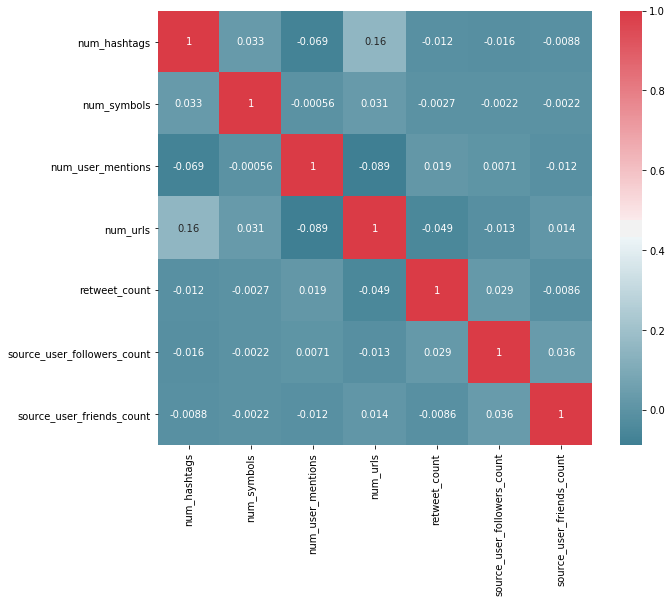

In [483]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)


In [484]:
from sklearn.preprocessing import LabelEncoder
'''lc=LabelEncoder()
data['lang']=lc.fit_transform(data['lang'])'''
lc1=LabelEncoder()
data['source_user_geo_enabled']=lc1.fit_transform(data['source_user_geo_enabled'])
lc2=LabelEncoder()
data['source_user_verified']=lc2.fit_transform(data['source_user_verified'])
lc3=LabelEncoder()
data['source_user_geo_enabled']=lc3.fit_transform(data['source_user_geo_enabled'])
'''lc4=LabelEncoder()
data['label']=lc4.fit_transform(data['label'])'''


"lc4=LabelEncoder()\ndata['label']=lc4.fit_transform(data['label'])"

In [485]:
list2=[]
for i in data.lang.unique():
  if len(data[data.lang==i])<100:
    list2.append(i)
print(len(list2))    

39


In [0]:
for i in list2:
  data.drop(data[data["lang"]==i].index,axis=0,inplace=True)

In [487]:
len(data)

9437

In [488]:
data.lang.unique()

array(['en', 'fr', 'und', 'es', 'pt', 'in', 'ar'], dtype=object)

In [489]:
df_eng=pd.DataFrame()
df_eng=data[data.lang=='en']
len(df_eng)

7352

In [490]:
df_eng.head()

,tweet_text,creation_time,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label
0,"URL schemes that Sileo supports, so you can be...",Fri Apr 26 18:17:41 +0000 2019,0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,1,0,Collusive
1,RT @TheLifeDiaries: Never compare your life to...,Thu Feb 28 05:28:01 +0000 2013,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,0,0,Genuine
2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,Sun Jan 20 15:56:32 +0000 2019,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,0,0,Collusive
3,"#Meeseva Apply, Online, Centers, Services, App...",Sat Feb 02 10:16:47 +0000 2019,1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,0,0,Collusive
5,RT @mbatshuayi: 💪🏾 a couple idiots should neve...,Mon Feb 26 22:45:38 +0000 2018,0.0,0.0,1.0,0.0,6476.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,419.0,1586.0,11135,1,0,Genuine


In [491]:
data.tail(6)

,tweet_text,creation_time,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label
9996,https://t.co/fmX2x426Vy @malcolmross17 new 🔥🔥🔥...,Mon May 29 18:49:05 +0000 2017,0.0,0.0,1.0,1.0,8.0,3,"<a href=""http://twitter.com/download/iphone"" r...",und,238.0,201.0,2706,1,0,Collusive
9997,https://t.co/9458tZM1j6 @Sick_promo,Thu Oct 13 18:49:58 +0000 2016,0.0,0.0,0.0,1.0,8.0,2,"<a href=""http://twitter.com/download/android"" ...",und,657.0,561.0,6256,0,0,Collusive
9998,RT @Borestrom: Congrats @JasonMillerCA for mak...,Wed Nov 23 08:43:07 +0000 2016,0.0,0.0,2.0,1.0,1.0,0,"<a href=""http://twitter.com/download/android"" ...",en,26784.0,7831.0,25196,1,0,Genuine
9999,Absolutely love this @Bulova Skeleton Automati...,Tue Jan 08 14:00:53 +0000 2019,16.0,0.0,1.0,1.0,21.0,8,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",en,503.0,343.0,814,0,0,Collusive
10000,RT @CNET: This kid can crack any of your passw...,Mon Apr 30 15:31:07 +0000 2018,0.0,0.0,1.0,0.0,43.0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,55216.0,55161.0,15325,0,0,Genuine
10001,Hey People!! Music coming SOON!! Check out my ...,Fri Sep 22 22:30:42 +0000 2017,0.0,0.0,0.0,1.0,19.0,1,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,1006.0,71.0,67,0,0,Collusive


In [0]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import PorterStemmer

In [493]:
!pip install emoji --upgrade

Requirement already up-to-date: emoji in /usr/local/lib/python3.6/dist-packages (0.5.4)


In [0]:
import emoji

**preprocessing of tweets to extract words from different features such as @, changing urls to stringURL and removing hashtags**

In [495]:
def preprocess_tweet(tweet):
  #converting all to lower case
  tweet=tweet.lower()
  #converting all tweet urls to string "URL"
  tweet=re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
  #converting all @username to "AT_USER"
  tweet=re.sub('@[^\s]+','AT_USER',tweet)
  #removing numbers from tweets
  tweet= re.sub(r'\d+','', tweet)
  #converting all multiple white spaces to a single space
  tweet=re.sub('[\s]+',' ',tweet)
  #converting hastags to name after hastags
  tweet=re.sub(r'#([^\s]+)',r'Hashtag',tweet)
  #converting emojis to words
  tweet=emoji.demojize(tweet)
  tweet = re.sub(r'[?|$|.|!|ÿ|œ¹|ð]','',tweet)
  #Removing special characters such as punctuation from tweets
  tweet=tweet.replace(r'[^a-zA-Z_]','')
  #Stemming words in text
  word=' '.join(([word for word in tweet.split()]))
  return word

print(preprocess_tweet("@Rose RT T-Shirt ðŸŒ¹ðŸŒ¹ðŸŒ¹ You going #Manjot Can get this now at https://t.co/VsmSa6BnQG https://t.co/5WaHGvW7Tb"))

AT_USER rt t-shirt you going Hashtag can get this now at URL URL


In [496]:
df_eng.columns

Index(['tweet_text', 'creation_time', 'num_hashtags', 'num_symbols',
       'num_user_mentions', 'num_urls', 'retweet_count', 'favorite_count',
       'source', 'lang', 'source_user_followers_count',
       'source_user_friends_count', 'source_user_statuses_count',
       'source_user_geo_enabled', 'source_user_verified', 'label'],
      dtype='object')

**Preprocessing tweets by calling the preprocess_tweet function and then using demojize to convert Emojis present in data to words or sentiment expressed by them.**

In [0]:
final_list=[]
labels=df_eng.label
labels2=df_eng.num_hashtags
labels3=df_eng.num_user_mentions
labels4=df_eng.retweet_count
labels5=df_eng.favorite_count
labels6=df_eng.source_user_followers_count
labels7=df_eng.source_user_friends_count
labels8=df_eng.source_user_statuses_count
labels9=df_eng.source_user_geo_enabled
labels10=df_eng.source_user_verified
for row in df_eng["tweet_text"]:
  final_list.append((preprocess_tweet(row)))
df_new=pd.DataFrame({'clean_text':final_list,'label':labels,'num_hashtags':labels2,'num_user_mentions':labels3, 'retweet_count':labels4, 'favorite_count':labels5,
       'source_user_followers_count':labels6,
       'source_user_friends_count':labels7, 'source_user_statuses_count':labels8,
       'source_user_geo_enabled':labels9, 'source_user_verified':labels10 })

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_new[['source_user_followers_count']]=sc.fit_transform(df_new[['source_user_followers_count']])
sc1=StandardScaler()
df_new[['source_user_friends_count']]=sc1.fit_transform(df_new[['source_user_friends_count']])
sc2=StandardScaler()
df_new[['retweet_count']]=sc2.fit_transform(df_new[['retweet_count']])
sc3=StandardScaler()
df_new[['favorite_count']]=sc.fit_transform(df_new[['favorite_count']])
sc4=StandardScaler()
df_new[['num_hashtags']]=sc4.fit_transform(df_new[['num_hashtags']])
sc5=StandardScaler()
df_new[['num_user_mentions']]=sc.fit_transform(df_new[['num_user_mentions']])
sc=StandardScaler()
df_new[['source_user_statuses_count']]=sc.fit_transform(df_new[['source_user_statuses_count']])

In [499]:
df_new.tail()

,clean_text,label,num_hashtags,num_user_mentions,retweet_count,favorite_count,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified
9995,looks like we are doing something right URL,Genuine,-0.450270,-0.573579,-0.094434,-0.027682,-0.091751,-0.121584,-0.326068,1,0
9998,rt AT_USER congrats AT_USER for making the top...,Genuine,-0.450270,0.959580,-0.094922,-0.031539,-0.074994,0.022177,0.189225,1,0
9999,absolutely love this AT_USER skeleton automati...,Collusive,6.368237,0.193000,-0.092971,-0.029825,-0.093379,-0.130972,-0.345090,0,0
10000,rt AT_USER this kid can crack any of your pass...,Genuine,-0.450270,0.193000,-0.090824,-0.031539,-0.055105,0.990193,-0.027092,0,0
10001,hey people music coming soon check out my yt c...,Collusive,-0.450270,-0.573579,-0.093166,-0.031325,-0.093028,-0.136535,-0.361460,0,0


In [500]:
df_eng.head()

,tweet_text,creation_time,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label
0,"URL schemes that Sileo supports, so you can be...",Fri Apr 26 18:17:41 +0000 2019,0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,1,0,Collusive
1,RT @TheLifeDiaries: Never compare your life to...,Thu Feb 28 05:28:01 +0000 2013,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,0,0,Genuine
2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,Sun Jan 20 15:56:32 +0000 2019,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,0,0,Collusive
3,"#Meeseva Apply, Online, Centers, Services, App...",Sat Feb 02 10:16:47 +0000 2019,1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,0,0,Collusive
5,RT @mbatshuayi: 💪🏾 a couple idiots should neve...,Mon Feb 26 22:45:38 +0000 2018,0.0,0.0,1.0,0.0,6476.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,419.0,1586.0,11135,1,0,Genuine


In [501]:
'''c=type(None)
index=""
def emojipresent(input_text):
  t_parse=p.parse(input_text)
  if type(t_parse.emojis) is not c:
    index="Emoji"
  else:
    index="NoEmoji"
  return index
'''

'c=type(None)\nindex=""\ndef emojipresent(input_text):\n  t_parse=p.parse(input_text)\n  if type(t_parse.emojis) is not c:\n    index="Emoji"\n  else:\n    index="NoEmoji"\n  return index\n'

In [502]:
df_eng.head()

,tweet_text,creation_time,num_hashtags,num_symbols,num_user_mentions,num_urls,retweet_count,favorite_count,source,lang,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified,label
0,"URL schemes that Sileo supports, so you can be...",Fri Apr 26 18:17:41 +0000 2019,0.0,0.0,0.0,0.0,12.0,31,"<a href=""http://twitter.com/download/android"" ...",en,2032.0,309.0,9866,1,0,Collusive
1,RT @TheLifeDiaries: Never compare your life to...,Thu Feb 28 05:28:01 +0000 2013,0.0,0.0,1.0,0.0,1036.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,202.0,368.0,628,0,0,Genuine
2,Sneak Attack on Skybase👀🤖 #Fortnite #GameofGam...,Sun Jan 20 15:56:32 +0000 2019,3.0,0.0,0.0,0.0,9.0,9,"<a href=""http://twitter.com/download/android"" ...",en,324.0,796.0,103,0,0,Collusive
3,"#Meeseva Apply, Online, Centers, Services, App...",Sat Feb 02 10:16:47 +0000 2019,1.0,0.0,0.0,1.0,159.0,34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,57.0,1640.0,249,0,0,Collusive
5,RT @mbatshuayi: 💪🏾 a couple idiots should neve...,Mon Feb 26 22:45:38 +0000 2018,0.0,0.0,1.0,0.0,6476.0,0,"<a href=""http://twitter.com/download/iphone"" r...",en,419.0,1586.0,11135,1,0,Genuine


In [503]:
'''tlist=[]
for row in df_eng["tweet_text"]:
  tlist.append(emojipresent(row))

df_new["is_emoji"]=tlist'''

'tlist=[]\nfor row in df_eng["tweet_text"]:\n  tlist.append(emojipresent(row))\n\ndf_new["is_emoji"]=tlist'

In [504]:
df_new.head()

,clean_text,label,num_hashtags,num_user_mentions,retweet_count,favorite_count,source_user_followers_count,source_user_friends_count,source_user_statuses_count,source_user_geo_enabled,source_user_verified
0,"url schemes that sileo supports, so you can be...",Collusive,-0.450270,-0.573579,-0.093849,-0.024897,-0.092310,-0.131667,-0.146722,1,0
1,rt AT_USER never compare your life to others y...,Genuine,-0.450270,0.193000,0.006051,-0.031539,-0.093590,-0.130460,-0.349166,0,0
2,sneak attack on skybase:eyes::robot_face: Hash...,Collusive,0.828200,-0.573579,-0.094141,-0.029611,-0.093505,-0.121707,-0.360671,0,0
3,"Hashtag apply, online, centers, services, appl...",Collusive,-0.024113,-0.573579,-0.079508,-0.024254,-0.093691,-0.104445,-0.357472,0,0
5,rt AT_USER :flexed_biceps_medium-dark_skin_ton...,Genuine,-0.450270,0.193000,0.536770,-0.031539,-0.093438,-0.105549,-0.118912,1,0


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,stop_words= 'english',ngram_range=(1,2))

In [506]:
type(train_tfidf[0])

scipy.sparse.csr.csr_matrix

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer= CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')


In [508]:
train_vect.shape

(7352, 1000)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(df_new['clean_text'],df_new['label'],test_size=0.2,random_state=9)
xtrain_tfidf=tfidf.fit_transform(x_train)
xval_tfidf=tfidf.transform(x_val)



In [0]:
xtrain_cv=c_vectorizer.fit_transform(x_train)
xval_cv=c_vectorizer.fit_transform(x_val)

In [511]:
print("Shape of test data:", xtrain_tfidf.shape)
print("Shape of test data:", xval_tfidf.shape)

Shape of test data: (5881, 5000)
Shape of test data: (1471, 5000)


In [512]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
lc=LogisticRegression()
lc.fit(xtrain_tfidf,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [517]:
y_pred=lc.predict(xval_tfidf)
def print_score(y_val,y_pred):
  print("accuracy score:", accuracy_score(y_val,y_pred))
  print("confusion matrix:",confusion_matrix(y_val,y_pred))
print_score(y_val,y_pred)

accuracy score: 0.7919782460910945
confusion matrix: [[438 177]
 [129 727]]


In [514]:
import xgboost as xgb
clf=xgb.XGBClassifier(learning_rate=0.1,n_estimators=200,max_depth=5,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.005,objective='binary:logistic',n_thread=4,scale_pos_weight=1)
clf.fit(xtrain_tfidf,y_train)
y_pred=clf.predict(xval_tfidf)
print_score(y_val,y_pred)

accuracy score: 0.7627464309993202
confusion matrix: [[442 173]
 [176 680]]


In [515]:
from sklearn.tree import DecisionTreeClassifier
clf2=DecisionTreeClassifier()
clf2.fit(xtrain_tfidf,y_train)
y_pred=clf2.predict(xval_tfidf)
print_score(y_val,y_pred)

accuracy score: 0.7539089055064582
confusion matrix: [[433 182]
 [180 676]]
